In [16]:
#import libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML
sns.set()

In [17]:
df_train = pd.read_csv('cs-training.csv')
df_test = pd.read_csv('cs-test.csv')
df_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_test.drop('Unnamed: 0', axis = 1, inplace = True)
df_test.drop('SeriousDlqin2yrs', axis = 1, inplace = True)

In [18]:
df_train.columns = ['target', 'UnsecuredLines', 'age', 'PastDue30-59days', 'DebtRatio', 'MonthlyIncome', 'OpenCredit',
                   'Late_90days', 'RealEstate','PastDue60-89days', 'Dependents']

In [19]:
df_test.columns = ['UnsecuredLines', 'age', 'PastDue30-59days', 'DebtRatio', 'MonthlyIncome', 'OpenCredit',
                   'Late_90days', 'RealEstate','PastDue60-89days', 'Dependents']

In [20]:
df_train.head()

,target,UnsecuredLines,age,PastDue30-59days,DebtRatio,MonthlyIncome,OpenCredit,Late_90days,RealEstate,PastDue60-89days,Dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [21]:
df_test.head()

,UnsecuredLines,age,PastDue30-59days,DebtRatio,MonthlyIncome,OpenCredit,Late_90days,RealEstate,PastDue60-89days,Dependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [22]:
df_train.isnull().sum()

target                  0
UnsecuredLines          0
age                     0
PastDue30-59days        0
DebtRatio               0
MonthlyIncome       29731
OpenCredit              0
Late_90days             0
RealEstate              0
PastDue60-89days        0
Dependents           3924
dtype: int64

In [23]:
df_test.isnull().sum()

UnsecuredLines          0
age                     0
PastDue30-59days        0
DebtRatio               0
MonthlyIncome       20103
OpenCredit              0
Late_90days             0
RealEstate              0
PastDue60-89days        0
Dependents           2626
dtype: int64

In [24]:
df_train['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

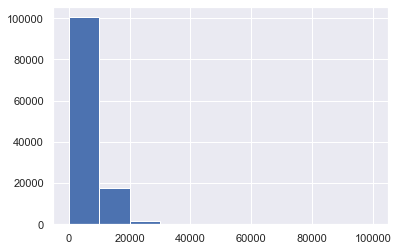

In [25]:
df_train['MonthlyIncome'].hist(bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])

In [26]:
df_train['MonthlyIncome'].fillna(np.mean(df_train['MonthlyIncome']), inplace = True)
df_test['MonthlyIncome'].fillna(np.mean(df_train['MonthlyIncome']), inplace = True)

In [27]:
df_train['Dependents'].fillna(df_train['Dependents'].value_counts().argmax(), inplace = True)
df_test['Dependents'].fillna(df_train['Dependents'].value_counts().argmax(), inplace = True)

In [28]:
event = len(df_train[df_train['target'] == 1])/len(df_train)
event

0.06684

THE DATASET IS HIGHLY IMBALANCED AS LESS THAN 7% DEFAULTS

In [39]:
warnings.filterwarnings(action='once')
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [30]:
features = df_train.columns.tolist()
features

['target',
 'UnsecuredLines',
 'age',
 'PastDue30-59days',
 'DebtRatio',
 'MonthlyIncome',
 'OpenCredit',
 'Late_90days',
 'RealEstate',
 'PastDue60-89days',
 'Dependents']

In [31]:
target = df_train['target']

In [32]:
def transform(target):
    dico = {1: 'default', 0: 'paid'}
    return dico[target]

In [33]:
target = target.apply(lambda x : transform(x))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features[1:]], df_train.target, random_state = 0)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))

In [36]:
lr = LogisticRegression().fit(X_train_scaled, y_train)
lr_predicted = lr.predict(X_test_scaled)

Precision: 0.63
Recall: 0.05
f1_score: 0.09


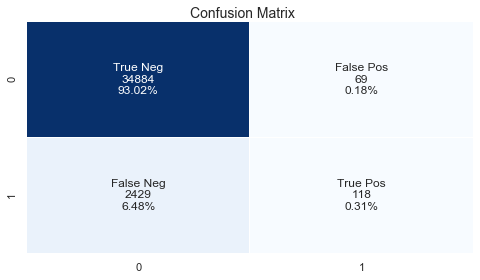

In [41]:
f, ax = plt.subplots(figsize=(8, 4))
confusion = confusion_matrix(y_test, lr_predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
hm = sns.heatmap(confusion, ax =ax, annot = labels, cmap = 'Blues', linewidths = .05, fmt = '', cbar = False)

f.subplots_adjust(top=0.93)
t= f.suptitle('Confusion Matrix', fontsize=14)

print('Precision: {:.2f}'. format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'. format(recall_score(y_test, lr_predicted)))
print('f1_score: {:.2f}'.format(f1_score(y_test, lr_predicted)))

In [42]:
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

Precision: 0.59
Recall: 0.19
f1_score: 0.29


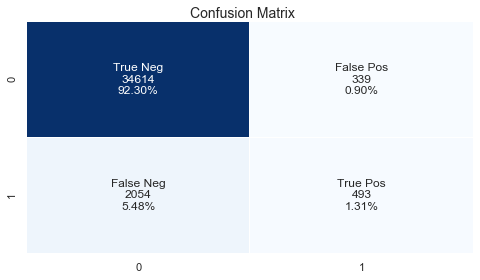

In [45]:
f, ax = plt.subplots(figsize=(8, 4))
confusion = confusion_matrix(y_test, predict)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
hm = sns.heatmap(confusion, ax =ax, annot = labels, cmap = 'Blues', linewidths = .05, fmt = '', cbar = False)

f.subplots_adjust(top=0.93)
t= f.suptitle('Confusion Matrix', fontsize=14)

print('Precision: {:.2f}'. format(precision_score(y_test, predict)))
print('Recall: {:.2f}'. format(recall_score(y_test, predict)))
print('f1_score: {:.2f}'.format(f1_score(y_test, predict)))

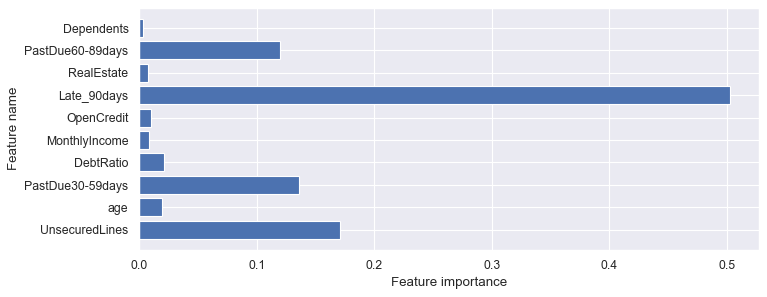

Feature importances: [0.17095034 0.01988115 0.13596503 0.02116416 0.00846658 0.01040506
 0.50228784 0.00779927 0.11973116 0.00334942]


In [46]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, features[1:])
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
pd.Series(predict).apply(lambda x: transform(x))

In [47]:
train = df_train.copy()
train.drop([features[2], features[4], features[5], features[6], features[8], features[10]], axis = 1, inplace = True)
train.head()

,target,UnsecuredLines,PastDue30-59days,Late_90days,PastDue60-89days
0,1,0.766127,2,0,0
1,0,0.957151,0,0,0
2,0,0.658180,1,1,0
3,0,0.233810,0,0,0
4,0,0.907239,1,0,0


In [48]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(np.array(train[train.columns[1:]]), np.array(train['target']),
                                                    random_state = 0)

In [49]:
clf_1 = GradientBoostingClassifier(random_state = 0)
clf_1.fit(X_train1, y_train1)
predict_1 = clf_1.predict(X_test1)

Precision: 0.59
Recall: 0.20
f1_score: 0.30


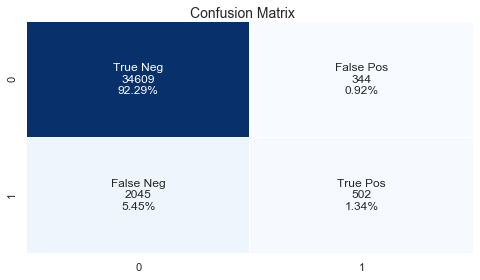

In [51]:
f, ax = plt.subplots(figsize=(8, 4))
confusion = confusion_matrix(y_test1, predict_1)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
hm = sns.heatmap(confusion, ax =ax, annot = labels, cmap = 'Blues', linewidths = .05, fmt = '', cbar = False)

f.subplots_adjust(top=0.93)
t= f.suptitle('Confusion Matrix', fontsize=14)

print('Precision: {:.2f}'. format(precision_score(y_test1, predict_1)))
print('Recall: {:.2f}'. format(recall_score(y_test1, predict_1)))
print('f1_score: {:.2f}'.format(f1_score(y_test1, predict_1)))

In [67]:
gbc = GradientBoostingClassifier(random_state = 0)

param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 300],
    'max_depth': [3, 5, 6]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [53]:
def grid_search_investigator(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=3)
    grid_search = GridSearchCV(gbc, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True)
    grid_search.fit(X_train1, y_train1)

    # make the predictions
    y_pred = grid_search.predict(X_test1)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Gradient Boosting Classifier optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test1, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [68]:
warnings.filterwarnings('ignore')
grid_search_clf = grid_search_investigator(refit_score='recall_score')

Best params for recall_score
{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}

Confusion matrix of Gradient Boosting Classifier optimized for recall_score on the test data:
     pred_neg  pred_pos
neg     33881      1072
pos      1697       850


In [69]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)

In [70]:
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 
         'param_max_depth', 'param_n_estimators', 'param_learning_rate']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_n_estimators,param_learning_rate
20,0.426,0.316,0.926,3,300,1
19,0.433,0.313,0.927,3,200,1
18,0.439,0.308,0.928,3,100,1
26,0.444,0.227,0.930,6,300,1
24,0.444,0.227,0.930,6,100,1


In [71]:
y_scores = grid_search_clf.predict_proba(X_test1)[:, 1]
y_scores

array([0.01095109, 0.07310898, 0.01711979, ..., 0.00813904, 0.00863351,
       0.01095109])

In [72]:
precision, recall, thresholds = precision_recall_curve(y_test1, y_scores)

In [73]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

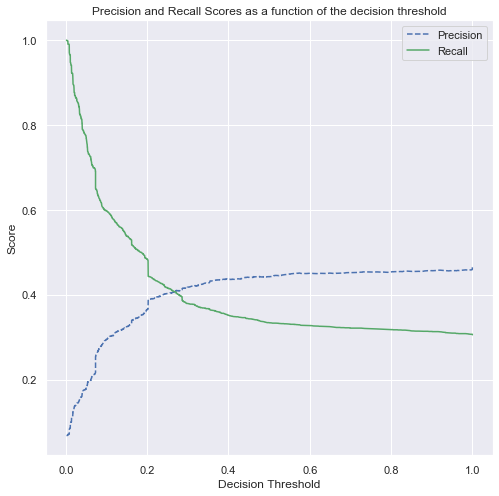

In [74]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

In [103]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test1, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    closest_zero = np.argmin(np.abs(thresholds - 0.24))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    plt.figure(figsize=(8,8))
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_r, closest_zero_p, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()

     pred_neg  pred_pos
neg     33337      1616
pos      1468      1079


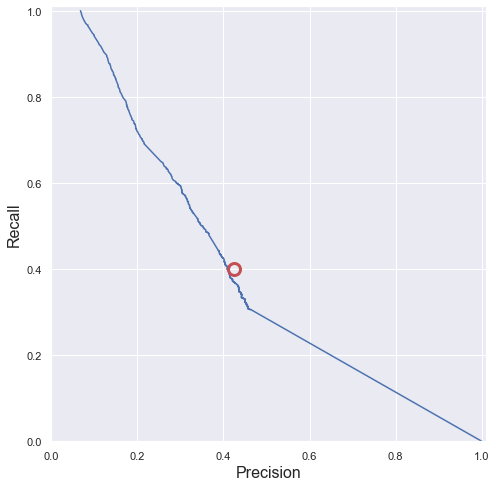

In [104]:
precision_recall_threshold(precision, recall, thresholds, 0.24)

In [106]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8349886045303688


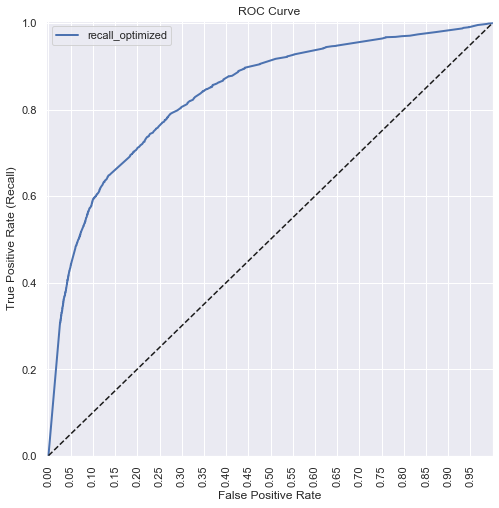

In [107]:
fpr, tpr, auc_thresholds = roc_curve(y_test1, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [108]:
X_test1

array([[8.32658260e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999900e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04372855e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.18787000e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.49403090e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.15548920e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [112]:
np.array([[1,2,3]])

array([[1, 2, 3]])